In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import csv
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d kunalgupta2616/dog-vs-cat-images-data

100% 990M/991M [00:53<00:00, 17.7MB/s]
100% 991M/991M [00:53<00:00, 19.5MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dog-vs-cat-images-data.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import sys
!{sys.executable} -m pip install tensorflow

In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [ ]:
directory_train = r"/content/dogcat/train"
directory_test = r"/content/dogcat/validation"
train_dataset = keras.utils.image_dataset_from_directory(
    directory = directory_train,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

test_dataset = keras.utils.image_dataset_from_directory(
    directory = directory_test,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


class_name_test = test_dataset.class_names
class_name_train = train_dataset.class_names
class_name_train

Found 25000 files belonging to 2 classes.
Found 8000 files belonging to 2 classes.


['cats', 'dogs']

# Sample Images

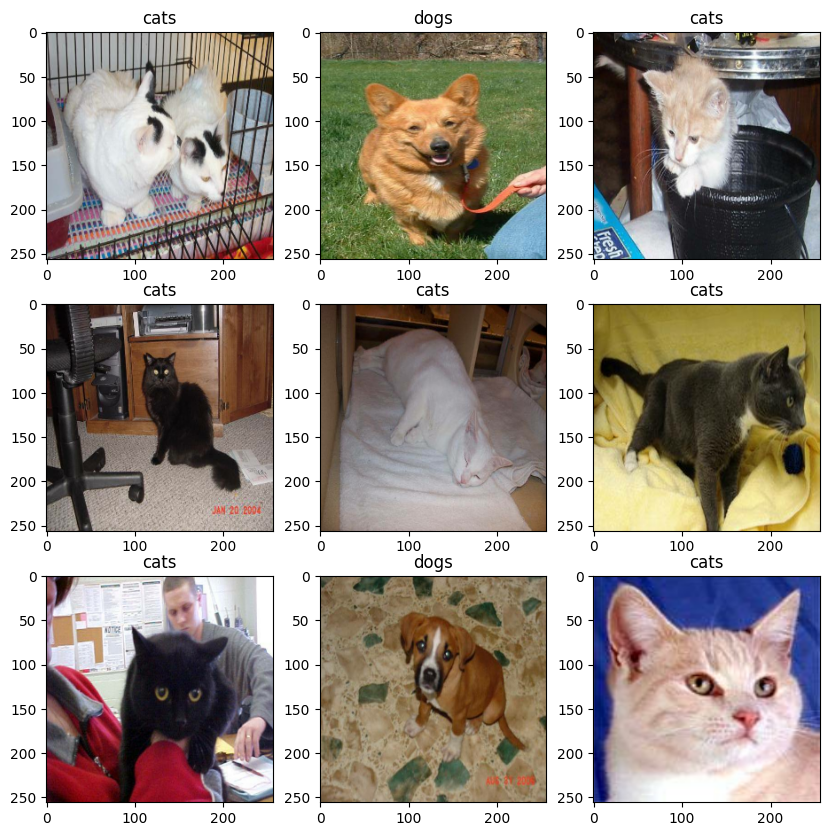

In [ ]:
for images, labels in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint32"))
        plt.title(class_name_train[labels[i]])
#         plt.axis("off")

# Normalizing the dataset

In [ ]:
def normalize_image(image, label):
    """Normalize images to have values between 0 and 1."""
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(normalize_image)
test_dataset = test_dataset.map(normalize_image)

In [ ]:
model = Sequential([
    Conv2D(32,kernel_size=(3,3),padding='valid',activation = 'relu',input_shape=(256,256,3)),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),
    Conv2D(64,kernel_size=(3,3),padding='valid',activation = 'relu',input_shape=(256,256,3)),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),
    Conv2D(128,kernel_size=(3,3),padding='valid',activation = 'relu',input_shape=(256,256,3)),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),
    Flatten(),
    Dense(128,activation='relu'),
#      Dense(120,activation='relu'),
#      Dense(80,activation='relu'),
     Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 128)     

In [ ]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
model.fit(train_dataset, epochs=10)

Epoch 1/10
782/782 [==============================] - 56s 68ms/step - loss: 0.5863 - accuracy: 0.6862
Epoch 2/10
782/782 [==============================] - 55s 69ms/step - loss: 0.4570 - accuracy: 0.7847
Epoch 3/10
782/782 [==============================] - 55s 69ms/step - loss: 0.3458 - accuracy: 0.8466
Epoch 4/10
782/782 [==============================] - 54s 69ms/step - loss: 0.2138 - accuracy: 0.9118
Epoch 5/10
782/782 [==============================] - 53s 68ms/step - loss: 0.1134 - accuracy: 0.9574
Epoch 6/10
782/782 [==============================] - 54s 69ms/step - loss: 0.0763 - accuracy: 0.9724
Epoch 7/10
782/782 [==============================] - 54s 68ms/step - loss: 0.0581 - accuracy: 0.9800
Epoch 8/10
782/782 [==============================] - 54s 68ms/step - loss: 0.0441 - accuracy: 0.9846
Epoch 9/10
782/782 [==============================] - 54s 69ms/step - loss: 0.0367 - accuracy: 0.9881
Epoch 10/10
782/782 [==============================] - 54s 69ms/step - loss: 0.029

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset,  verbose=1)

print('\nTest accuracy:', test_acc)

250/250 [==============================] - 13s 52ms/step - loss: 62.8970 - accuracy: 0.9079

Test accuracy: 0.9078750014305115
